In [46]:
import pandas as pd

# 파일 경로 설정
main_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
sector_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"
district_file = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

# 데이터 불러오기
df_main = pd.read_csv(main_file, encoding='utf-8')
df_sector = pd.read_csv(sector_file, encoding='utf-8')
df_district = pd.read_csv(district_file, encoding='cp949')

# 1. 상권별 자치구 정보 추가
df_sector_subset = df_sector[['상권_코드_명', '자치구_코드_명']].drop_duplicates()
df_main = df_main.merge(df_sector_subset, on='상권_코드_명', how='left')

# 2. 자치구별 영업 개월 수 정보 추가
df_district_subset = df_district[['자치구_코드_명', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균']]
df_main = df_main.merge(df_district_subset, on='자치구_코드_명', how='left')

# 결과 저장
output_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_자치구_추가.csv"
df_main.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"데이터 저장 완료: {output_file}")

KeyError: '자치구_코드_명'

In [ ]:
import pandas as pd

district_file = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

# 여러 인코딩 시도
encodings = ["utf-8", "cp949", "euc-kr"]

for enc in encodings:
    try:
        df_district = pd.read_csv(district_file, encoding=enc)
        print(f"✅ 인코딩: {enc}")
        print(df_district.head())  # 처음 5줄 출력
        break
    except Exception as e:
        print(f"❌ {enc} 인코딩 오류: {e}")
print(df_district.columns)
print(df_district.shape)  # (행 개수, 열 개수)

❌ utf-8 인코딩 오류: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte
✅ 인코딩: cp949
   기준_년분기_코드  자치구_코드 자치구_코드_명 상권_변화_지표 상권_변화_지표_명  운영_영업_개월_평균  폐업_영업_개월_평균  \
0      20191   11545      금천구       LL       다이나믹           86           47   
1      20191   11470      양천구       LL       다이나믹           90           46   
2      20191   11140       중구       HH         정체          112           57   
3      20191   11620      관악구       LL       다이나믹           91           47   
4      20234   11200      성동구       LH       상권확장          100           53   

   서울_운영_영업_개월_평균  서울_폐업_영업_개월_평균  
0              93              48  
1              93              48  
2              93              48  
3              93              48  
4             102              51  
Index(['기준_년분기_코드', '자치구_코드', '자치구_코드_명', '상권_변화_지표', '상권_변화_지표_명',
       '운영_영업_개월_평균', '폐업_영업_개월_평균', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균'],
      dtype='object')
(575, 9)


In [ ]:
print(df_district.isnull().sum())  # 각 컬럼별 결측값 개수

기준_년분기_코드         0
자치구_코드            0
자치구_코드_명          0
상권_변화_지표          0
상권_변화_지표_명        0
운영_영업_개월_평균       0
폐업_영업_개월_평균       0
서울_운영_영업_개월_평균    0
서울_폐업_영업_개월_평균    0
dtype: int64


In [ ]:
import pandas as pd

# 📌 1. 파일 경로 설정
main_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
sector_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"
district_file = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

# 📌 2. 데이터 불러오기 (한글 인코딩 문제 대비)
df_main = pd.read_csv(main_file, encoding="utf-8-sig")  # ✅ UTF-8-SIG 사용
df_sector = pd.read_csv(sector_file, encoding="utf-8-sig")  # ✅ 동일한 인코딩 사용
df_district = pd.read_csv(district_file, encoding="euc-kr")  # ✅ EUC-KR 인코딩 사용

# 📌 3. 상권 데이터에 자치구 정보 추가
df_sector_subset = df_sector[['상권_코드_명', '자치구_코드_명']].drop_duplicates()
df_merged = df_main.merge(df_sector_subset, on='상권_코드_명', how='left')

# 📌 4. 자치구별 영업 개월 데이터 추가
df_final = df_merged.merge(df_district, on='자치구_코드_명', how='left')

# 📌 5. 최종 데이터 확인
print(df_final.head())  # 첫 5행 출력
print(df_final.isnull().sum())  # null 값 확인

# 📌 6. CSV 파일로 저장 (UTF-8 인코딩)
output_file = r"C:\Users\m\Downloads\서울시_상권_분석_최종본.csv"
df_final.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"✅ 데이터 저장 완료: {output_file}")

   기준_년분기_코드_x 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명 서비스_업종_코드  \
0        20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
1        20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
2        20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
3        20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
4        20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   

  서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  ...  프랜차이즈_점포_수  자치구_코드_명  기준_년분기_코드_y  \
0      전자상거래업    10          10    10  ...           0       종로구      20234.0   
1      전자상거래업    10          10    10  ...           0       종로구      20233.0   
2      전자상거래업    10          10    10  ...           0       종로구      20223.0   
3      전자상거래업    10          10    10  ...           0       종로구      20191.0   
4      전자상거래업    10          10    10  ...           0       종로구      20232.0   

    자치구_코드 상권_변화_지표  상권_변화_지표_명  운영_영업

In [ ]:
import chardet

file_path = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

with open(file_path, "rb") as f:
    raw_data = f.read(100000)  # 처음 100000바이트만 읽어서 인코딩 분석
    result = chardet.detect(raw_data)

print("파일의 인코딩:", result["encoding"])

파일의 인코딩: EUC-KR


In [ ]:
import pandas as pd

# 파일 경로 설정
main_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"
sector_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
district_file = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

# 데이터 불러오기
df_main = pd.read_csv(main_file, encoding="utf-8-sig")
df_sector = pd.read_csv(sector_file, encoding="utf-8-sig")
df_district = pd.read_csv(district_file, encoding="euc-kr")

# 1. 상권 데이터에 자치구 정보 추가 (상권_코드_명 → 자치구_코드_명 매핑)
df_sector_subset = df_sector[['상권_코드_명', '자치구_코드_명']].drop_duplicates()
df_main = df_main.merge(df_sector_subset, on="상권_코드_명", how="left")

# 2. 자치구 데이터를 기준_년분기_코드 + 자치구_코드_명 기준으로 병합
df_district_subset = df_district[['기준_년분기_코드', '자치구_코드_명', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균']]
df_main = df_main.merge(df_district_subset, on=['기준_년분기_코드', '자치구_코드_명'], how="left")

# 3. 불필요한 컬럼 제거
drop_columns = ['기준_년분기_코드_y', '자치구_코드', '상권_변화_지표', '상권_변화_지표_명', '운영_영업_개월_평균', '운영_영업_개월_평균']
df_main = df_main.drop(columns=[col for col in drop_columns if col in df_main.columns])

# 저장 (필요 시)
output_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\통합데이터_최종.csv"
df_main.to_csv(output_file, encoding="utf-8-sig", index=False)

print("데이터 병합 완료! ✅")

KeyError: "['자치구_코드_명'] not in index"

In [ ]:
import pandas as pd

# 파일 경로
main_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
sector_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"
district_file = r"C:\Users\m\Downloads\서울시 상권분석서비스(상권변화지표-자치구).csv"

# 데이터 불러오기
df_main = pd.read_csv(main_file, encoding="utf-8-sig")
df_sector = pd.read_csv(sector_file, encoding="utf-8-sig")
df_district = pd.read_csv(district_file, encoding="euc-kr")

# 1. 상권 데이터에 자치구 정보 추가 (상권_코드_명 → 자치구_코드_명 매핑)
df_sector_subset = df_sector[['상권_코드_명', '자치구_코드_명']].drop_duplicates()
df_main = df_main.merge(df_sector_subset, on="상권_코드_명", how="left")

# 2. 자치구 데이터를 기준_년분기_코드 + 자치구_코드_명 기준으로 병합
df_district_subset = df_district[['기준_년분기_코드', '자치구_코드_명', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균']]
df_main = df_main.merge(df_district_subset, on=["기준_년분기_코드", "자치구_코드_명"], how="left")

# 3. 최종 저장
output_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
df_main.to_csv(output_file, encoding="utf-8-sig", index=False)
print(f"파일 저장 완료: {output_file}")

파일 저장 완료: C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv


In [ ]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"

# 데이터 불러오기
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 1. 컬럼명 출력
print("📌 컬럼명 목록:")
print(df.columns.tolist())

# 2. Null 값 개수 확인
print("\n📌 컬럼별 Null 값 개수:")
print(df.isnull().sum())

# 3. Null 값 비율 확인
print("\n📌 컬럼별 Null 값 비율 (%):")
print((df.isnull().sum() / len(df) * 100).round(2))

📌 컬럼명 목록:
['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '자치구_코드_명', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균']

📌 컬럼별 Null 값 개수:
기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
서비스_업종_코드             0
서비스_업종_코드_명           0
점포_수                  0
유사_업종_점포_수            0
개업_율                  0
개업_점포_수               0
폐업_률                  0
폐업_점포_수               0
프랜차이즈_점포_수            0
자치구_코드_명          49465
서울_운영_영업_개월_평균    49465
서울_폐업_영업_개월_평균    49465
dtype: int64

📌 컬럼별 Null 값 비율 (%):
기준_년분기_코드         0.00
상권_구분_코드          0.00
상권_구분_코드_명        0.00
상권_코드             0.00
상권_코드_명           0.00
서비스_업종_코드         0.00
서비스_업종_코드_명       0.00
점포_수              0.00
유사_업종_점포_수        0.00
개업_율              0.00
개업_점포_수           0.00
폐업_률              0.00
폐업_점포_수           0.00
프랜차이즈_점포_수        0.

In [ ]:
import pandas as pd

# 파일 경로
input_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스(점포-상권, 컬럼수정).csv"
output_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거.csv"

# 데이터 불러오기
df = pd.read_csv(input_file, encoding="utf-8-sig")

# 제거할 컬럼 목록
drop_columns = ['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '서비스_업종_코드']

# 해당 컬럼 제거
df = df.drop(columns=drop_columns)

# 새로운 파일로 저장
df.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"✅ 컬럼 제거 완료! 저장된 파일: {output_file}")

✅ 컬럼 제거 완료! 저장된 파일: C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거.csv


In [ ]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거.csv"

# 데이터 불러오기
df = pd.read_csv(file_path, encoding="utf-8-sig")

print(df.head())  # 데이터 샘플 확인

   기준_년분기_코드               상권_코드_명 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  \
0      20191  동대문문구완구거리(동대문문구완구시장)      전자상거래업    10          10    10   
1      20191        서래마을카페거리(서래마을)       치킨전문점     0           1     0   
2      20191               신논현역 1번          가방     3           3     0   
3      20191                 서연중학교         사진관     6           6    17   
4      20191                먹골역 5번        조명용품     2           2     0   

   개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수 자치구_코드_명  서울_운영_영업_개월_평균  서울_폐업_영업_개월_평균  
0        1     0        0           0      종로구            93.0            48.0  
1        0   100        1           1      서초구            93.0            48.0  
2        0     0        0           0      서초구            93.0            48.0  
3        1     0        0           0     서대문구            93.0            48.0  
4        0     0        0           0      중랑구            93.0            48.0  


In [ ]:
import pandas as pd

# 파일 경로
main_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거.csv"
feature_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"

# 데이터 불러오기
df_main = pd.read_csv(main_file, encoding="utf-8-sig")
df_feature = pd.read_csv(feature_file, encoding="utf-8-sig")

# 컬럼명 변경 (기준을 맞추기 위해)
df_main.rename(columns={"연분기": "기준_년분기_코드", "상권명": "상권_코드_명", "업종명": "서비스_업종_코드_명"}, inplace=True)

# 필요한 컬럼만 선택
df_feature_subset = df_feature[["기준_년분기_코드", "상권_코드_명", "서비스_업종_코드_명", "당월_매출_금액", "당월_매출_건수", "총_유동인구_수"]]

# 데이터 병합 (연결 기준: 기준_년분기_코드, 상권_코드_명, 서비스_업종_코드_명)
df_merged = df_main.merge(df_feature_subset, on=["기준_년분기_코드", "상권_코드_명", "서비스_업종_코드_명"], how="left")

# 저장
output_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_매출추가.csv"
df_merged.to_csv(output_file, index=False, encoding="utf-8-sig")

print("✅ 데이터 병합 완료! 새로운 파일이 저장되었습니다.")

✅ 데이터 병합 완료! 새로운 파일이 저장되었습니다.


In [ ]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_매출추가.csv"

# 데이터 불러오기
df = pd.read_csv(file_path, encoding="utf-8-sig")

print(df.head())  # 데이터 샘플 확인

   기준_년분기_코드               상권_코드_명 서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업율  \
0      20191  동대문문구완구거리(동대문문구완구시장)      전자상거래업    10          10   10   
1      20191        서래마을카페거리(서래마을)       치킨전문점     0           1    0   
2      20191               신논현역 1번          가방     3           3    0   
3      20191                 서연중학교         사진관     6           6   17   
4      20191                먹골역 5번        조명용품     2           2    0   

   개업_점포_수  폐업률  폐업_점포_수  프랜차이즈_점포_수  자치구명  서울_운영_영업_개월_평균  서울_폐업_영업_개월_평균  \
0        1    0        0           0   종로구            93.0            48.0   
1        0  100        1           1   서초구            93.0            48.0   
2        0    0        0           0   서초구            93.0            48.0   
3        1    0        0           0  서대문구            93.0            48.0   
4        0    0        0           0   중랑구            93.0            48.0   

   당월_매출_금액  당월_매출_건수  총_유동인구_수  
0       NaN       NaN       NaN  
1       NaN       NaN   

In [ ]:
import pandas as pd

# 파일 경로
main_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거.csv"
feature_file = r"C:\Users\m\Desktop\머신러닝 사용 데이터\구 데이터\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv"

# 데이터 불러오기 (인코딩 방식 통일)
df_main = pd.read_csv(main_file, encoding="utf-8-sig")
df_feature = pd.read_csv(feature_file, encoding="utf-8-sig")

# 컬럼명 변경 (병합을 위한 키 값 맞추기)
df_main.rename(columns={"연분기": "기준_년분기_코드", "상권명": "상권_코드_명", "업종명": "서비스_업종_코드_명"}, inplace=True)

# 데이터 타입 맞추기 (기준_년분기_코드가 숫자로 저장된 경우 대비)
df_main["기준_년분기_코드"] = df_main["기준_년분기_코드"].astype(str)
df_feature["기준_년분기_코드"] = df_feature["기준_년분기_코드"].astype(str)

# 문자열 컬럼 공백 제거 (상권명, 업종명)
df_main["상권_코드_명"] = df_main["상권_코드_명"].str.strip()
df_main["서비스_업종_코드_명"] = df_main["서비스_업종_코드_명"].str.strip()
df_feature["상권_코드_명"] = df_feature["상권_코드_명"].str.strip()
df_feature["서비스_업종_코드_명"] = df_feature["서비스_업종_코드_명"].str.strip()

# 필요한 컬럼만 선택
df_feature_subset = df_feature[["기준_년분기_코드", "상권_코드_명", "서비스_업종_코드_명", "당월_매출_금액", "당월_매출_건수", "총_유동인구_수"]]

# 병합 수행 (left join)
df_merged = df_main.merge(df_feature_subset, on=["기준_년분기_코드", "상권_코드_명", "서비스_업종_코드_명"], how="left")

# 결과 확인 (병합 성공 여부)
print(df_merged[["기준_년분기_코드", "상권_코드_명", "서비스_업종_코드_명", "당월_매출_금액", "당월_매출_건수", "총_유동인구_수"]].head(10))

# 저장
output_file = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_매출추가.csv"
df_merged.to_csv(output_file, index=False, encoding="utf-8-sig")

print("✅ 데이터 병합 완료! 새로운 파일이 저장되었습니다.")

  기준_년분기_코드               상권_코드_명 서비스_업종_코드_명      당월_매출_금액     당월_매출_건수  \
0     20191  동대문문구완구거리(동대문문구완구시장)      전자상거래업           NaN          NaN   
1     20191        서래마을카페거리(서래마을)       치킨전문점           NaN          NaN   
2     20191               신논현역 1번          가방           NaN          NaN   
3     20191                 서연중학교         사진관           NaN          NaN   
4     20191                먹골역 5번        조명용품           NaN          NaN   
5     20191               강서구다솔마을         의약품           NaN          NaN   
6     20191                삼전역 4번         철물점  4.817746e+05     3.600000   
7     20191         개웅초등학교(개웅중학교)      일반교습학원  1.114259e+07    51.545455   
8     20191              구로디지털단지역         한의원  2.704723e+08  4728.333333   
9     20191                개봉초등학교       외국어학원           NaN          NaN   

    총_유동인구_수  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6  1736634.0  
7   648154.0  
8  1417116.0  
9        NaN 

In [ ]:
# 피처 데이터에서 존재하는 상권명, 업종명 리스트 추출
feature_sangkwon_list = df_feature["상권_코드_명"].unique()
feature_upjong_list = df_feature["서비스_업종_코드_명"].unique()

# 병합되지 않은(= NaN이 남아 있는) 행 찾기
df_nan = df_merged[df_merged["당월_매출_금액"].isna()]

# 병합되지 않은 상권명, 업종명 조합 출력
nan_sangkwon_list = df_nan["상권_코드_명"].unique()
nan_upjong_list = df_nan["서비스_업종_코드_명"].unique()

# 병합 실패한 상권명들 출력
print("🔍 병합되지 않은 상권명 목록:")
print(set(nan_sangkwon_list) - set(feature_sangkwon_list))

# 병합 실패한 업종명들 출력
print("\n🔍 병합되지 않은 업종명 목록:")
print(set(nan_upjong_list) - set(feature_upjong_list))

🔍 병합되지 않은 상권명 목록:
{'절두산순교성지', '신흥시장', '청담역 12번', '덕산중학교', '삼성중앙역 7번', '회기역 2번', '화곡보람2차아파트', '서초우방유쉘아파트', '옥정중학교', '언남고등학교', '정곡초등학교', '중랑역 2번', '청계산원터골', '옥수동우편취급국', '개포지하차도 북측', '싸리고개근린공원', '세화어린이공원', '방아다리근린공원(횃불트리니티신학대학원대학교)', '백운시장', '강남골목시장', '서대문구청', '동서시장', '개봉프라자(고척근린시장)', '바우뫼공원', '언주역 6번', '증산3교남측', '신길역 1번', '삼성중앙역 5번', '신내역 2번', '유영시장', '동남상가', '문래동남성맨션', '신수시장', '갈산공원', '월정로시장', '양남시장', '도림시장', '은마종합상점가', '장석교회', '한남초등학교', '문이교', '흑석2치안센터', '고척중학교', '장안교', '서울시립영등포장애인복지관', '서교시장', '신림주공2단지(광신고등학교)', '자양종합시장(기능상실)', '영등포구청역 2번', '시영B상가(중계 그린아파트 B 상가)', '서울나래학교(염곡어린이공원)', '고산초등학교', '내방역 6번', '동대문상가D동', '홍지문', '번동시장', '방배배수지체육공원', '관성묘', '장안초등학교', '논현종합시장', '영동대교남단', '정원여중', '대림상가(청계상가)', '역촌중앙시장', '필동 골목형상점가', '석관시장', '백련시장', '논현로18길', '이대 앞 스타트업 상점가', '효문고등학교', '수유북부골목시장', '구세군강북종합사회복지관', '강동구청(강동구청역 2번)', '신풍역 6번(신길6동공영주차장)', '청와대사랑채', '금강수목원아파트', '우리시장', '이태원역 북측', '남태령역(서울전자고등학교)', '둔촌푸르지오아파트', '풍납초등학교(풍납백제문화공원)', '인수초등학교', '역삼월드메르디앙아파트', '관악동부센트레빌아파트(은천로35라길)', '신정2동 골

In [ ]:
import pandas as pd

# 원본 데이터 파일 경로
df2_path = "C:/Users/m/Desktop/머신러닝 사용 데이터/구 데이터/피처엔지니어링한통합데이터/피처엔지니어링일단다한통합데이터.csv"

# 원본 데이터 로드
df2 = pd.read_csv(df2_path, encoding='utf-8')  # 인코딩 문제 생기면 'cp949'로 변경

# 병합되지 않은 상권명이 원본(df2)에는 존재하는지 확인
for name in {'절두산순교성지', '신흥시장', '청담역 12번', '덕산중학교', '삼성중앙역 7번', '회기역 2번', '화곡보람2차아파트', '서초우방유쉘아파트', '옥정중학교', '언남고등학교', '정곡초등학교', '중랑역 2번', '청계산원터골', '옥수동우편취급국', '개포지하차도 북측', '싸리고개근린공원', '세화어린이공원', '방아다리근린공원(횃불트리니티신학대학원대학교)', '백운시장', '강남골목시장', '서대문구청', '동서시장', '개봉프라자(고척근린시장)', '바우뫼공원', '언주역 6번', '증산3교남측', '신길역 1번', '삼성중앙역 5번', '신내역 2번', '유영시장', '동남상가', '문래동남성맨션', '신수시장', '갈산공원', '월정로시장', '양남시장', '도림시장', '은마종합상점가', '장석교회', '한남초등학교', '문이교', '흑석2치안센터', '고척중학교', '장안교', '서울시립영등포장애인복지관', '서교시장', '신림주공2단지(광신고등학교)', '자양종합시장(기능상실)', '영등포구청역 2번', '시영B상가(중계 그린아파트 B 상가)', '서울나래학교(염곡어린이공원)', '고산초등학교', '내방역 6번', '동대문상가D동', '홍지문', '번동시장', '방배배수지체육공원', '관성묘', '장안초등학교', '논현종합시장', '영동대교남단', '정원여중', '대림상가(청계상가)', '역촌중앙시장', '필동 골목형상점가', '석관시장', '백련시장', '논현로18길', '이대 앞 스타트업 상점가', '효문고등학교', '수유북부골목시장', '구세군강북종합사회복지관', '강동구청(강동구청역 2번)', '신풍역 6번(신길6동공영주차장)', '청와대사랑채', '금강수목원아파트', '우리시장', '이태원역 북측', '남태령역(서울전자고등학교)', '둔촌푸르지오아파트', '풍납초등학교(풍납백제문화공원)', '인수초등학교', '역삼월드메르디앙아파트', '관악동부센트레빌아파트(은천로35라길)', '신정2동 골목시장(오목교중앙시장)', '청운초등학교', '논현역 7번', '박미시장(기능상실)', '구로시장', '흑석시장', '합정시장', '삼구시장(로타리상가)', '청림동주민센터(상도중학교)', '종암아이파크2차후문', '염리초등학교', '강북북부시장', '동덕여대', '용두시장', '봉천현대시장', '방배역 2번(백석예술대학교)', '동대문상가C동', '연산군묘', '남서울상가', '천호역 1번(천호문구완구거리)', '강남시장(강남구 강남시장)', '봉천제일종합시장', '신설종합시장', '계남근린공원', '강남시장(동작구 강남시장)', '군자초등학교', '한국상담대학원대학교', '온수역 8번', '방배역 1번', '버티고개', 'team204(팀204)', '영진시장', '거여역 8번', '동대문상가A동', '체부동홍종문가옥', '푸른터시장(기능상실)', '상계역전종합상가', '대원종합시장', '명지전문대', '신림종합시장', '월곡역 4번', '청담근린공원', '시영2단지 무지개종합상가(중계 무지개2단지아파트상가)', '신월중앙시장'}:  # 리스트는 위에서 제공한 것 사용
    if name not in df2['상권_코드_명'].unique():
        print(f"🚨 {name} 원본 데이터에 없음!")

🚨 절두산순교성지 원본 데이터에 없음!
🚨 신흥시장 원본 데이터에 없음!
🚨 청담역 12번 원본 데이터에 없음!
🚨 덕산중학교 원본 데이터에 없음!
🚨 삼성중앙역 7번 원본 데이터에 없음!
🚨 회기역 2번 원본 데이터에 없음!
🚨 화곡보람2차아파트 원본 데이터에 없음!
🚨 서초우방유쉘아파트 원본 데이터에 없음!
🚨 옥정중학교 원본 데이터에 없음!
🚨 언남고등학교 원본 데이터에 없음!
🚨 정곡초등학교 원본 데이터에 없음!
🚨 중랑역 2번 원본 데이터에 없음!
🚨 청계산원터골 원본 데이터에 없음!
🚨 옥수동우편취급국 원본 데이터에 없음!
🚨 개포지하차도 북측 원본 데이터에 없음!
🚨 싸리고개근린공원 원본 데이터에 없음!
🚨 세화어린이공원 원본 데이터에 없음!
🚨 방아다리근린공원(횃불트리니티신학대학원대학교) 원본 데이터에 없음!
🚨 백운시장 원본 데이터에 없음!
🚨 강남골목시장 원본 데이터에 없음!
🚨 서대문구청 원본 데이터에 없음!
🚨 동서시장 원본 데이터에 없음!
🚨 개봉프라자(고척근린시장) 원본 데이터에 없음!
🚨 바우뫼공원 원본 데이터에 없음!
🚨 언주역 6번 원본 데이터에 없음!
🚨 증산3교남측 원본 데이터에 없음!
🚨 신길역 1번 원본 데이터에 없음!
🚨 삼성중앙역 5번 원본 데이터에 없음!
🚨 신내역 2번 원본 데이터에 없음!
🚨 유영시장 원본 데이터에 없음!
🚨 동남상가 원본 데이터에 없음!
🚨 문래동남성맨션 원본 데이터에 없음!
🚨 신수시장 원본 데이터에 없음!
🚨 갈산공원 원본 데이터에 없음!
🚨 월정로시장 원본 데이터에 없음!
🚨 양남시장 원본 데이터에 없음!
🚨 도림시장 원본 데이터에 없음!
🚨 은마종합상점가 원본 데이터에 없음!
🚨 장석교회 원본 데이터에 없음!
🚨 한남초등학교 원본 데이터에 없음!
🚨 문이교 원본 데이터에 없음!
🚨 흑석2치안센터 원본 데이터에 없음!
🚨 고척중학교 원본 데이터에 없음!
🚨 장안교 원본 데이터에 없음!
🚨 서울시립영등포장애인복지관 원본 데이터에 없음!
🚨 서교시장 원본 데이터에 없음!
🚨 신림주공2단지(광신고

In [ ]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_매출추가.csv"
output_path = r"C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_클린.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# null 값이 있는 행 제거
df_cleaned = df.dropna(subset=['당월_매출_금액', '당월_매출_건수', '총_유동인구_수'])

# 클린 데이터 저장
df_cleaned.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"처리 완료! 저장된 파일: {output_path}")

처리 완료! 저장된 파일: C:\Users\m\Downloads\서울시_상권분석_서비스_컬럼제거_클린.csv


매출 안정성 = 매출_금액의 중위값 / (표준편차 + 1) 매출 감소율 = (이전 분기 매출 - 현재 분기 매출) / (이전 분기 매출 + 1) 유동인구 안정성 = 유동인구수의 평균 / (표준편차 + 1) 소비 전환율 = 매출_금액 / (유동인구수 + 1) 종합 안정성 지표 = 위 요소들의 가중합

가중치 최적화 초기 설정

In [75]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv(r"C:\Users\m\Downloads\서울시_상권분석_서비스_매출추가.csv")

# '기준_년분기_코드' 기준으로 정렬
df = df.sort_values(by=["상권명", "연분기"])

# 이전 분기 매출 계산 (같은 상권 기준으로)
df["이전_분기_매출"] = df.groupby("상권명")["매출_금액"].shift(1)

# NaN 값을 0으로 채우기 (이전 분기 데이터가 없는 경우)
df["이전_분기_매출"] = df["이전_분기_매출"].fillna(0)

# 매출 안정성 계산
df["매출_안정성"] = df["매출_금액"].median() / (df["매출_금액"].std() + 1)

# 매출 감소율 계산
df["매출_감소율"] = (df["이전_분기_매출"] - df["매출_금액"]) / (df["이전_분기_매출"] + 1)

# 유동인구 안정성 계산
df["유동인구_안정성"] = df["유동인구수"].mean() / (df["유동인구수"].std() + 1)

# 소비 전환율 계산
df["소비_전환율"] = df["매출_금액"] / (df["유동인구수"] + 1)

# 초기 가중치 설정
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25

# 종합 안정성 지표 계산
df["종합_안정성"] = (w1 * df["매출_안정성"] + 
                     w2 * (1 - df["매출_감소율"]) + 
                     w3 * df["유동인구_안정성"] + 
                     w4 * df["소비_전환율"])

# 결과 확인
print(df[["연분기", "상권명", "매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성"]].head())

         연분기           상권명    매출_안정성        매출_감소율  유동인구_안정성      소비_전환율  \
6725   20191  4.19민주묘지역 2번  0.157823 -6.503816e+06   1.12712   12.458199   
6908   20191  4.19민주묘지역 2번  0.157823  1.299595e-01   1.12712   10.839138   
7671   20191  4.19민주묘지역 2번  0.157823 -6.100111e+00   1.12712   76.959092   
8576   20191  4.19민주묘지역 2번  0.157823 -4.168991e+00   1.12712  397.800899   
12135  20191  4.19민주묘지역 2번  0.157823  9.881854e-01   1.12712    4.699854   

             종합_안정성  
6725   1.625958e+06  
6908   3.248530e+00  
7671   2.133604e+01  
8576   1.010637e+02  
12135  1.499153e+00  


In [49]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv(r"C:\Users\m\Downloads\서울시_상권분석_서비스_매출추가.csv")

# 연분기 기준으로 정렬
df = df.sort_values(by=["상권명", "업종명", "연분기"])

# 이전 분기 매출 계산
df["이전_분기_매출"] = df.groupby(["상권명", "업종명"])["매출_금액"].shift(1)

# 20192부터 사용하도록 필터링
df = df[df["연분기"] > 20191].reset_index(drop=True)

# 매출 안정성 계산
df["매출_안정성"] = df["매출_금액"].median() / (df["매출_금액"].std() + 1)

# 매출 감소율 계산
df["매출_감소율"] = (df["이전_분기_매출"] - df["매출_금액"]) / (df["이전_분기_매출"] + 1)

# 유동인구 안정성 계산
df["유동인구_안정성"] = df["유동인구수"].mean() / (df["유동인구수"].std() + 1)

# 소비 전환율 계산
df["소비_전환율"] = df["매출_금액"] / (df["유동인구수"] + 1)

# 초기 가중치 설정
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25

# 종합 안정성 지표 계산
df["종합_안정성"] = (w1 * df["매출_안정성"] + 
                     w2 * (1 - df["매출_감소율"]) + 
                     w3 * df["유동인구_안정성"] + 
                     w4 * df["소비_전환율"])

# 결과 확인
df[["연분기", "상권명", "업종명", "매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성"]].head()

,연분기,상권명,업종명,매출_안정성,매출_감소율,유동인구_안정성,소비_전환율,종합_안정성
0,20192,4.19민주묘지역 2번,미용실,0.157765,0.171000,1.129539,14.720462,4.209191
1,20193,4.19민주묘지역 2번,미용실,0.157765,-0.188581,1.129539,16.098292,4.643544
2,20194,4.19민주묘지역 2번,미용실,0.157765,0.005751,1.129539,15.630575,4.478032
3,20201,4.19민주묘지역 2번,미용실,0.157765,-0.137575,1.129539,18.959110,5.345997
4,20202,4.19민주묘지역 2번,미용실,0.157765,-0.172682,1.129539,21.972605,6.108148


안정성 지표와 폐업률 간의 관계 분석

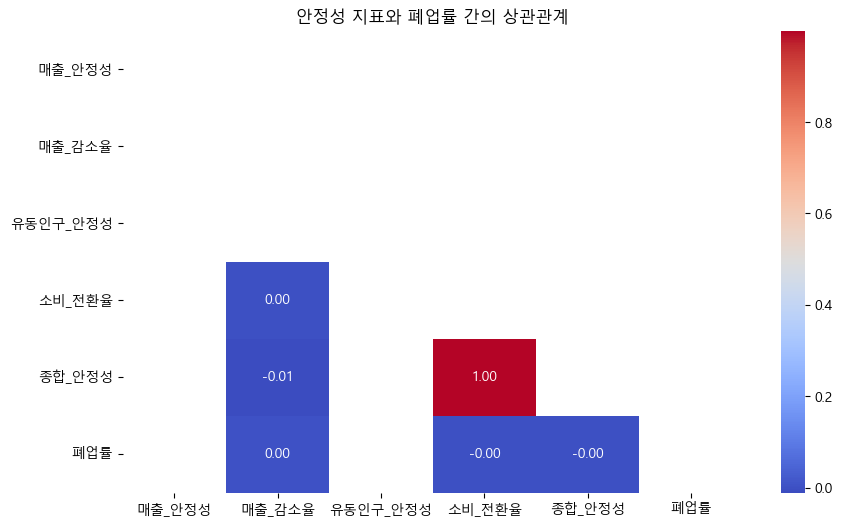

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv(r"C:\Users\m\Downloads\서울시_상권분석_서비스_매출추가.csv")

# 결측치 제거 (필요시 다른 방법 적용 가능)
df = df.dropna()

# 🔹 '이전_분기_매출' 컬럼 추가 (같은 상권-업종의 이전 분기 데이터 가져오기)
df["이전_분기_매출"] = df.sort_values(["상권명", "업종명", "연분기"]).groupby(["상권명", "업종명"])["매출_금액"].shift(1)

# 🔹 안정성 지표 계산
df["매출_안정성"] = df["매출_금액"].median() / (df["매출_금액"].std() + 1)

# 🔹 '이전_분기_매출'이 없는 경우(첫 분기)는 감소율을 0으로 설정
df["매출_감소율"] = (df["이전_분기_매출"] - df["매출_금액"]) / (df["이전_분기_매출"] + 1)
df["매출_감소율"] = df["매출_감소율"].fillna(0)  # NaN 값(첫 분기)은 0으로 대체

df["유동인구_안정성"] = df["유동인구수"].mean() / (df["유동인구수"].std() + 1)
df["소비_전환율"] = df["매출_금액"] / (df["유동인구수"] + 1)

# 🔹 가중치 적용하여 종합 안정성 지표 계산
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25
df["종합_안정성"] = (w1 * df["매출_안정성"] + 
                     w2 * (1 - df["매출_감소율"]) + 
                     w3 * df["유동인구_안정성"] + 
                     w4 * df["소비_전환율"])

# 🔹 상관계수 계산 및 히트맵 시각화
correlation_matrix = df[["매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성", "폐업률"]].corr()

# 히트맵 시각화
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("안정성 지표와 폐업률 간의 상관관계")
plt.show()

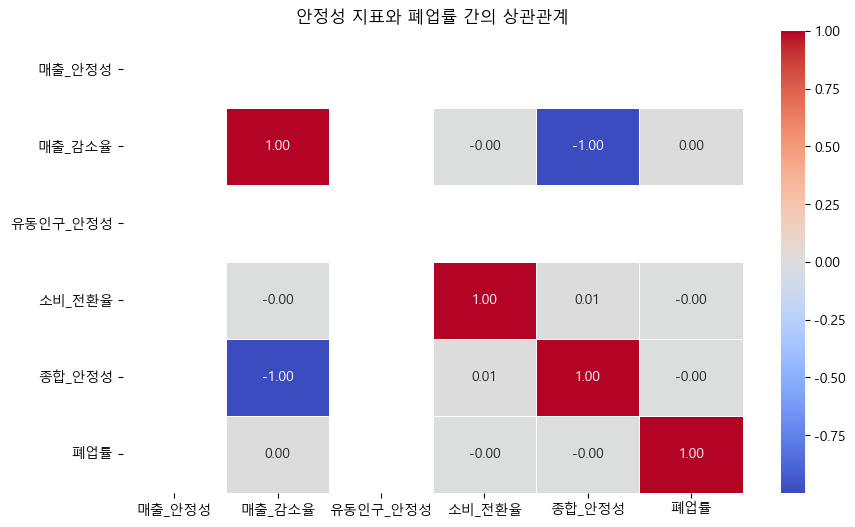

         연분기           상권명    매출_안정성        매출_감소율  유동인구_안정성      소비_전환율  \
6725   20191  4.19민주묘지역 2번  0.157823 -6.503816e+06   1.12712   12.458199   
6908   20191  4.19민주묘지역 2번  0.157823  1.299595e-01   1.12712   10.839138   
7671   20191  4.19민주묘지역 2번  0.157823 -6.100111e+00   1.12712   76.959092   
8576   20191  4.19민주묘지역 2번  0.157823 -4.168991e+00   1.12712  397.800899   
12135  20191  4.19민주묘지역 2번  0.157823  9.881854e-01   1.12712    4.699854   

             종합_안정성  
6725   1.625958e+06  
6908   3.248530e+00  
7671   2.133604e+01  
8576   1.010637e+02  
12135  1.499153e+00  


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 1. 데이터 로드
df = pd.read_csv(r"C:\Users\m\Downloads\서울시_상권분석_서비스_매출추가.csv")

# 📌 2. '기준_년분기_코드' 기준으로 정렬
df = df.sort_values(by=["상권명", "연분기"])

# 📌 3. 이전 분기 매출 계산 (같은 상권 기준으로)
df["이전_분기_매출"] = df.groupby("상권명")["매출_금액"].shift(1)
df["이전_분기_매출"] = df["이전_분기_매출"].fillna(0)  # NaN 값을 0으로 채움

# 📌 4. 매출 안정성 계산
df["매출_안정성"] = df["매출_금액"].median() / (df["매출_금액"].std() + 1)

# 📌 5. 매출 감소율 계산
df["매출_감소율"] = (df["이전_분기_매출"] - df["매출_금액"]) / (df["이전_분기_매출"] + 1)

# 📌 6. 유동인구 안정성 계산
df["유동인구_안정성"] = df["유동인구수"].mean() / (df["유동인구수"].std() + 1)

# 📌 7. 소비 전환율 계산
df["소비_전환율"] = df["매출_금액"] / (df["유동인구수"] + 1)

# 📌 8. 초기 가중치 설정
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25

# 📌 9. 종합 안정성 지표 계산
df["종합_안정성"] = (w1 * df["매출_안정성"] + 
                     w2 * (1 - df["매출_감소율"]) + 
                     w3 * df["유동인구_안정성"] + 
                     w4 * df["소비_전환율"])

# 📌 10. 상관계수 계산
required_columns = ["매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성", "폐업률"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"❌ 누락된 컬럼: {missing_columns}")
else:
    df_selected = df[required_columns].dropna()  # NaN 제거
    correlation_matrix = df_selected.corr()  # 상관계수 계산

    # 📌 11. 히트맵 시각화
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("안정성 지표와 폐업률 간의 상관관계")
    plt.show()

# 📌 12. 결과 확인
print(df[["연분기", "상권명", "매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성"]].head())

In [82]:
print(df[["매출_안정성", "유동인구_안정성"]].isna().sum())

매출_안정성      0
유동인구_안정성    0
dtype: int64


In [83]:
print(df["매출_안정성"].nunique(), df["유동인구_안정성"].nunique())

1 1


In [88]:
import pandas as pd

# CSV 파일 불러오기
file_path = "C:\\Users\\m\\Downloads\\서울시_상권분석_서비스_매출추가.csv"
df = pd.read_csv(file_path)

# 컬럼명 확인
print("컬럼명 확인:", df.columns)

# 🟢 '연분기'의 데이터 타입을 문자열로 변환
df["연분기"] = df["연분기"].astype(str)

# 🟢 '연분기'를 이용해 이전 분기 코드 생성
df["이전_분기_코드"] = df["연분기"].apply(
    lambda x: str(int(x[:4]) - 1) + "4" if x[4] == "1" 
    else x[:4] + str(int(x[4]) - 1)
)

# 🟢 '이전_분기_매출'을 찾기 위해 데이터프레임을 자기 자신과 병합
df = df.merge(df[["연분기", "상권명", "업종명", "매출_금액"]], 
              left_on=["이전_분기_코드", "상권명", "업종명"],
              right_on=["연분기", "상권명", "업종명"], 
              how="left", suffixes=("", "_이전"))

# '이전_분기_매출' 컬럼 생성 (NaN 값은 0으로 대체)
df["이전_분기_매출"] = df["매출_금액_이전"].fillna(0)

# 결과 확인
print(df.head())

컬럼명 확인: Index(['연분기', '상권명', '업종명', '점포_수', '유사_업종_점포_수', '개업율', '개업_점포_수', '폐업률',
       '폐업_점포_수', '프랜차이즈_점포_수', '자치구명', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균',
       '매출_금액', '매출_건수', '유동인구수'],
      dtype='object')
     연분기            상권명     업종명  점포_수  유사_업종_점포_수  개업율  개업_점포_수  폐업률  폐업_점포_수  \
0  20191         삼전역 4번     철물점     5           5    0        0    0        0   
1  20191  개웅초등학교(개웅중학교)  일반교습학원    10          11    9        1    9        1   
2  20191       구로디지털단지역     한의원     3           3    0        0   33        1   
3  20191       구로4동주민센터    육류판매     3           3    0        0    0        0   
4  20191           망원시장     화장품     5           6    0        0    0        0   

   프랜차이즈_점포_수 자치구명  서울_운영_영업_개월_평균  서울_폐업_영업_개월_평균         매출_금액        매출_건수  \
0           0  송파구            93.0            48.0  4.817746e+05     3.600000   
1           1  구로구            93.0            48.0  1.114259e+07    51.545455   
2           0  구로구            93.0            48.0  2.

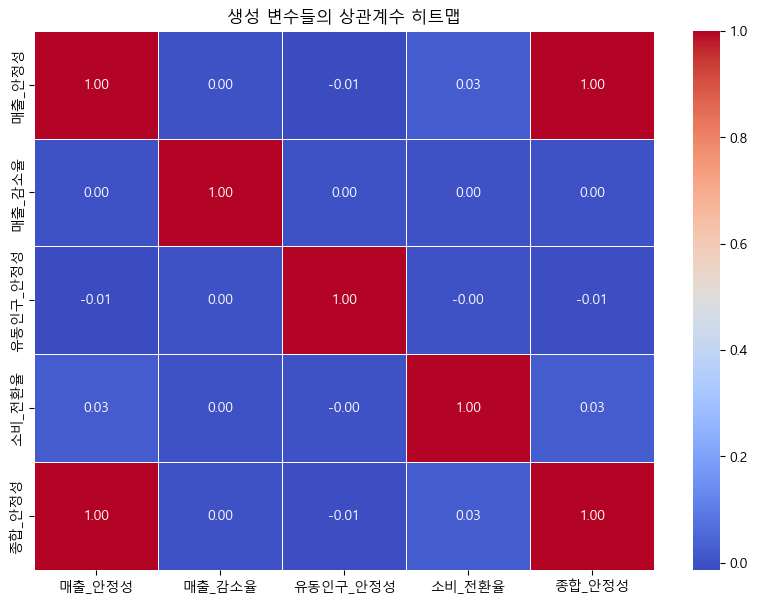

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "C:\\Users\\m\\Downloads\\서울시_상권분석_서비스_매출추가.csv"
df = pd.read_csv(file_path)

# 🟢 필요한 숫자형 변수 선택
df["이전_매출"] = df.groupby(["상권명", "업종명"])["매출_금액"].shift(1)  # 이전 분기 매출 추가
df["매출_안정성"] = df["매출_금액"].rolling(window=4, min_periods=1).std()  # 4개 분기 기준 변동성
df["매출_감소율"] = (df["이전_매출"] - df["매출_금액"]) / df["이전_매출"] * 100  # 매출 감소율 (%)
df["유동인구_안정성"] = df["유동인구수"].rolling(window=4, min_periods=1).std()  # 유동인구 변동성
df["소비_전환율"] = df["매출_건수"] / df["유동인구수"]  # 유동인구 대비 소비 전환율
df["종합_안정성"] = (df["매출_안정성"] + df["유동인구_안정성"]) / 2  # 매출 안정성과 유동인구 안정성 평균

# 🟢 새로운 변수들의 상관관계 분석
selected_features = ["매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성"]
corr_matrix = df[selected_features].corr()

# 🟢 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("생성 변수들의 상관계수 히트맵")
plt.show()

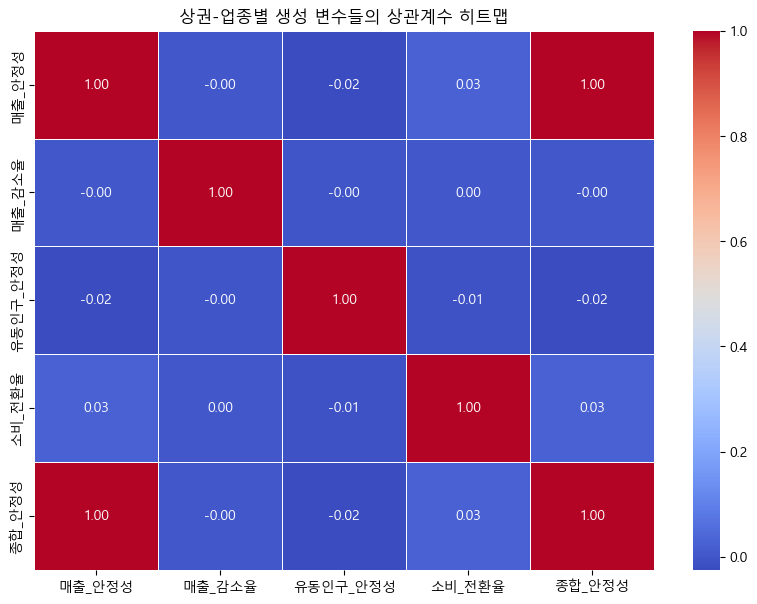

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "C:\\Users\\m\\Downloads\\서울시_상권분석_서비스_매출추가.csv"
df = pd.read_csv(file_path)

# 🟢 '연분기'를 정렬 (중요!)
df = df.sort_values(by=["상권명", "업종명", "연분기"])

# 🟢 상권-업종별 이전 분기 매출 추가
df["이전_매출"] = df.groupby(["상권명", "업종명"])["매출_금액"].shift(1)

# 🟢 매출 안정성 (상권-업종별 변동성)
df["매출_안정성"] = df.groupby(["상권명", "업종명"])["매출_금액"].rolling(window=4, min_periods=1).std().reset_index(level=[0,1], drop=True)

# 🟢 매출 감소율 (이전 분기 대비 변화율)
df["매출_감소율"] = (df["이전_매출"] - df["매출_금액"]) / df["이전_매출"] * 100

# 🟢 유동인구 안정성 (상권-업종별 유동인구 변동성)
df["유동인구_안정성"] = df.groupby(["상권명", "업종명"])["유동인구수"].rolling(window=4, min_periods=1).std().reset_index(level=[0,1], drop=True)

# 🟢 소비 전환율 (유동인구 대비 매출 건수 비율)
df["소비_전환율"] = df["매출_건수"] / df["유동인구수"]

# 🟢 종합 안정성 (매출 안정성과 유동인구 안정성의 평균)
df["종합_안정성"] = (df["매출_안정성"] + df["유동인구_안정성"]) / 2

# 🟢 새로운 변수들의 상관관계 분석
selected_features = ["매출_안정성", "매출_감소율", "유동인구_안정성", "소비_전환율", "종합_안정성"]
corr_matrix = df[selected_features].corr()

# 🟢 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("상권-업종별 생성 변수들의 상관계수 히트맵")
plt.show()